In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
df = pd.read_csv('/Users/mac/Documents/python_projects/Airbnb dataset/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
#Check for missing values and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [20]:
#Basic info about the dataset
#Shape of the dataset
print('Shape of dataset:')
print (df.shape)

#Count of missing values per column
print('\nMissing values per column:')
print (df.isnull().sum())

# Summary statistics for numeric columns
print(df.describe())

#Percentage of missing values
print(f"\nMissing values:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
    
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0]
missing_df
    



Shape of dataset:
(48895, 16)

Missing values per column:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64
                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530     

,Missing Count,Missing Percentage
name,16,0.032723
host_name,21,0.042949
last_review,10052,20.558339
reviews_per_month,10052,20.558339


In [31]:
#Data Cleaning 

#Handle missing values
df['name']= df['name'].fillna('No Name')
df['host_name'] = df['host_name'].fillna('No Name')

# Outlier detection for price variable
high_price_count = df[(df['price'] >= 5000) & (df['price'] <= 10000)].shape[0]
print(f"\nNumber of listings priced between $5000 and $10000: {high_price_count}")

# Since only 26 listings fall in this high price range out of 48895,
# they will be retained to avoid losing potentially valuable data.
# These are likely luxury listings in NYC.

# Summary note:
print("\nData cleaning decisions:")
print("- Missing values in 'last_review' and 'reviews_per_month' due to no reviews; may keep as is.")
print("- Extreme price outliers are minimal (26 listings between $5000 and $10000) and retained.")




Number of listings priced between $5000 and $10000: 26

Data cleaning decisions:
- Missing values in 'last_review' and 'reviews_per_month' due to no reviews; may keep as is.
- Extreme price outliers are minimal (26 listings between $5000 and $10000) and retained.


In [37]:
df.loc[df['price'] < 500,'price']

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 47660, dtype: int64

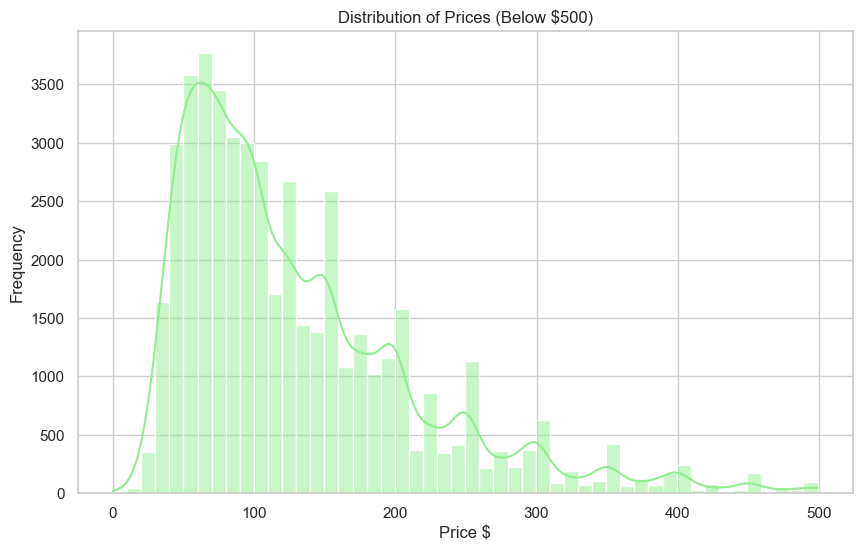

In [88]:
# Set the style for better visuals
sns.set_theme(style="whitegrid")

# Distribution of prices (limited to values below $500 for better visualization)
plt.figure(figsize=(10,6))
sns.histplot(df[df['price'] < 500]['price'], bins=50, color='lightgreen', kde=True)
plt.title("Distribution of Prices (Below $500)")
plt.xlabel("Price $")
plt.ylabel("Frequency")
plt.show()

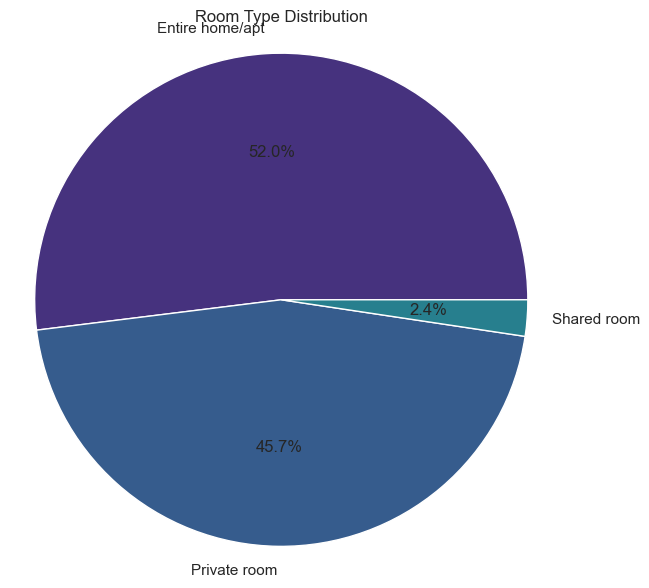

In [80]:
#count room types
room_counts = df['room_type'].value_counts()

#Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(room_counts, labels=room_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title("Room Type Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

/var/folders/m4/73z5fngj13lf7fc6mrgybdkc0000gn/T/ipykernel_35227/4243133687.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neighbourhoods.values, y=top_neighbourhoods.index, palette='viridis')


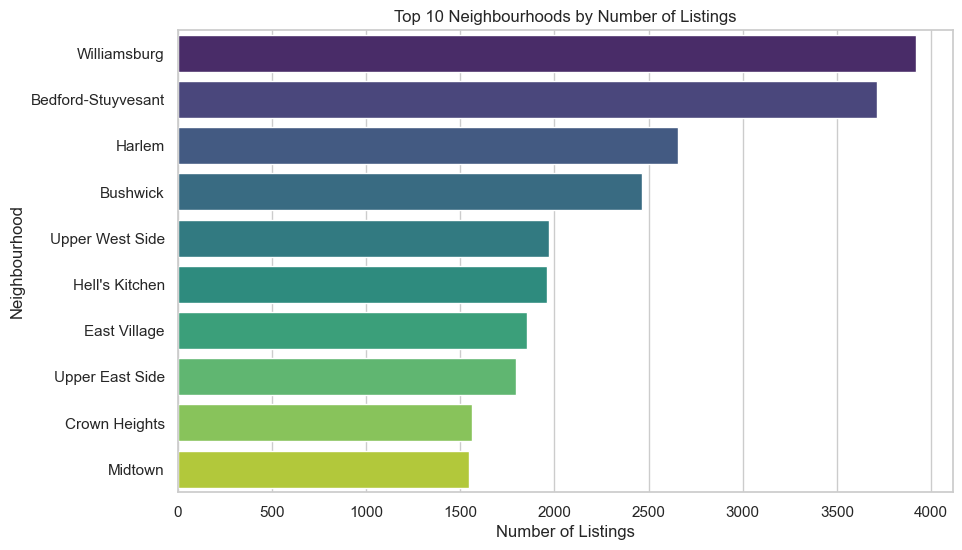

In [50]:
# Top 10 most listed neighborhoods
top_neighbourhoods = df['neighbourhood'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_neighbourhoods.values, y=top_neighbourhoods.index, palette='viridis')
plt.title('Top 10 Neighbourhoods by Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Neighbourhood')
plt.show()

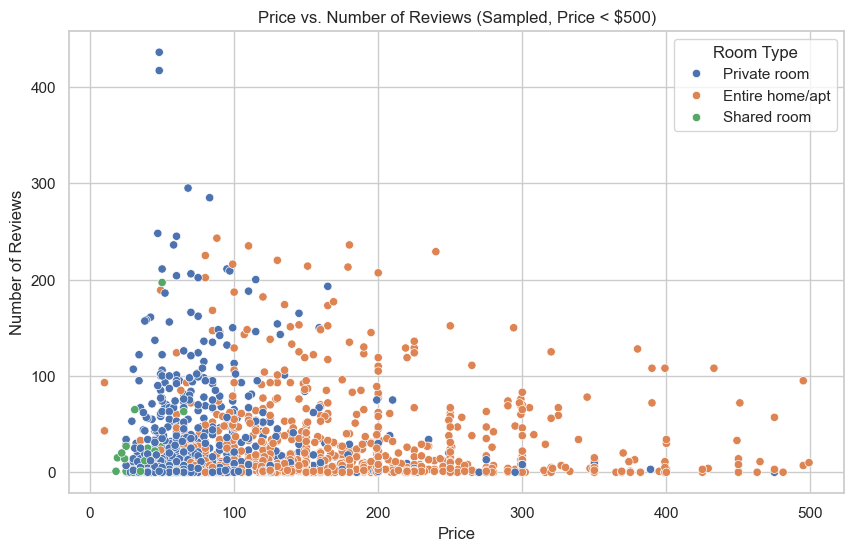

In [55]:
#Scatter plot for price vs number of reviews (limited for visibility)
plt.figure(figsize=(10,6))
sample = df[df['price'] < 500].sample(2000, random_state=1)
sns.scatterplot(data=sample, x='price', y='number_of_reviews', hue='room_type')
plt.title("Price vs. Number of Reviews (Sampled, Price < $500)")
plt.xlabel("Price")
plt.ylabel("Number of Reviews")
plt.legend(title='Room Type')
plt.show()


/var/folders/m4/73z5fngj13lf7fc6mrgybdkc0000gn/T/ipykernel_35227/4178311964.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered, x='room_type', y='price', palette='viridis')


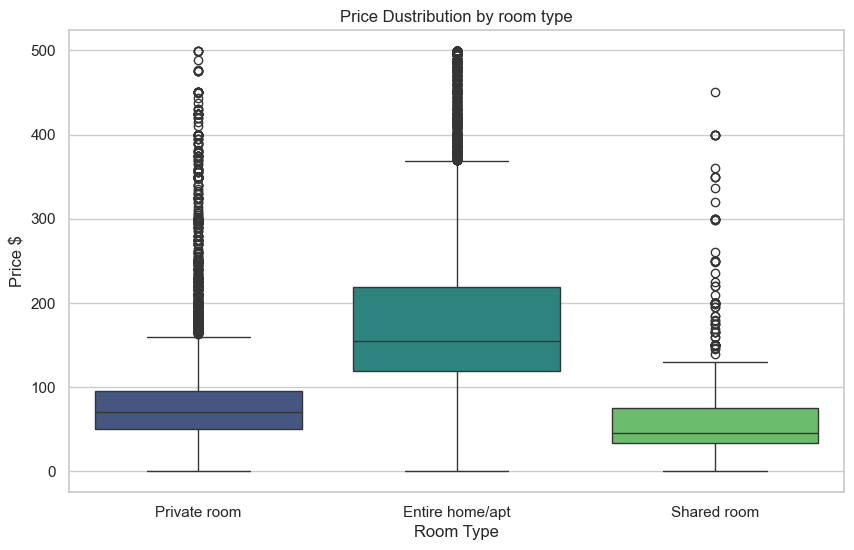

In [87]:
#boxplot for price vs room type
plt.figure(figsize=(10,6))
filtered = df[df['price'] < 500]
sns.boxplot(data=filtered, x='room_type', y='price', palette='viridis')
plt.title('Price Dustribution by room type')
plt.xlabel('Room Type')
plt.ylabel('Price $')
plt.show()

/var/folders/m4/73z5fngj13lf7fc6mrgybdkc0000gn/T/ipykernel_35227/169272311.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=host_data.values, y=host_data.index, palette='viridis')


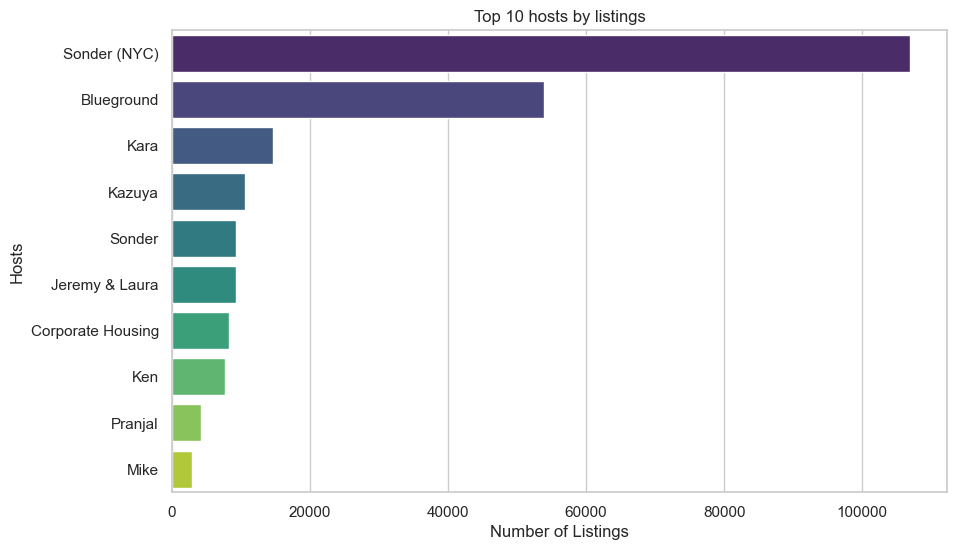

In [66]:
#Top 10 hosts
host_data = df.groupby('host_name')['calculated_host_listings_count'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=host_data.values, y=host_data.index, palette='viridis')
plt.title('Top 10 hosts by listings')
plt.xlabel('Number of Listings')
plt.ylabel('Hosts')
plt.show()

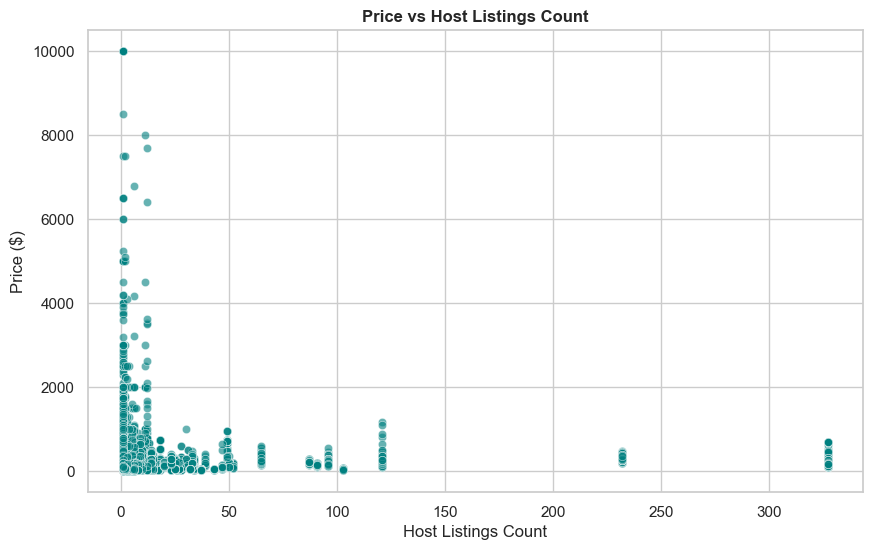

In [86]:
#Price Vs Host listings count
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='calculated_host_listings_count', y='price', alpha=0.6, color='teal')
plt.title('Price vs Host Listings Count', fontweight='bold')
plt.xlabel('Host Listings Count')
plt.ylabel('Price ($)')
plt.show()

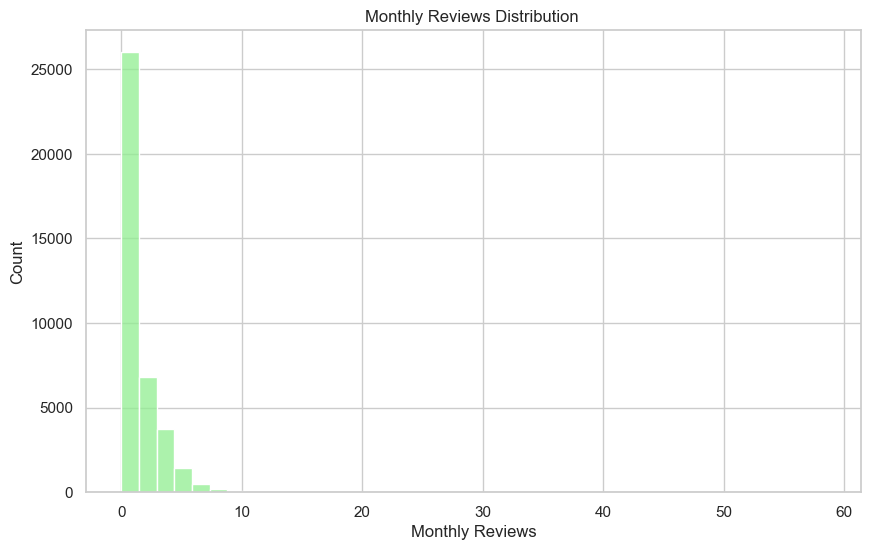

In [78]:
#histplot for monthly reviews of Airbnb
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='reviews_per_month', bins=40, color='lightgreen')
plt.title("Monthly Reviews Distribution ")
plt.xlabel("Monthly Reviews")
plt.ylabel("Count")
plt.show()

/var/folders/m4/73z5fngj13lf7fc6mrgybdkc0000gn/T/ipykernel_35227/1840547252.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='room_type', y='number_of_reviews', palette='viridis')


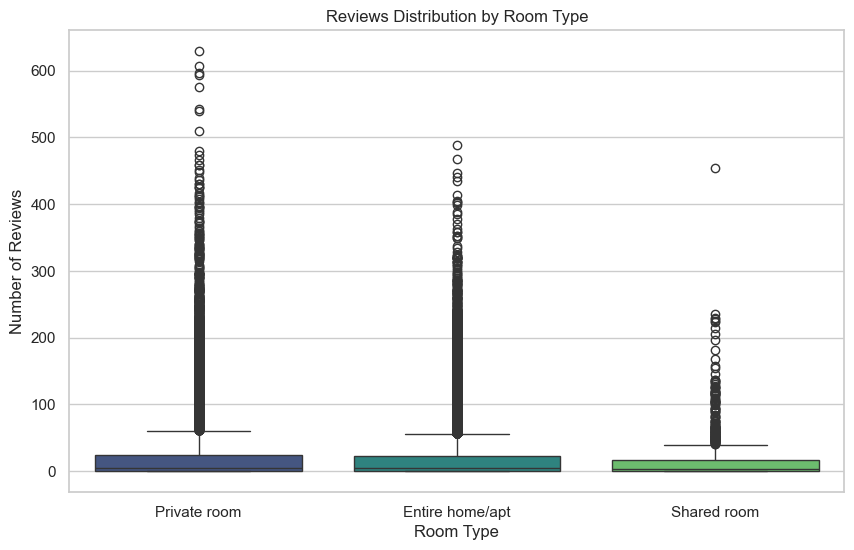

In [71]:
#boxplot for reviews Vs room type
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='room_type', y='number_of_reviews', palette='viridis')
plt.title('Reviews Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Reviews')
plt.show()


/var/folders/m4/73z5fngj13lf7fc6mrgybdkc0000gn/T/ipykernel_35227/852602335.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='neighbourhood_group', y='availability_365',  palette='viridis')


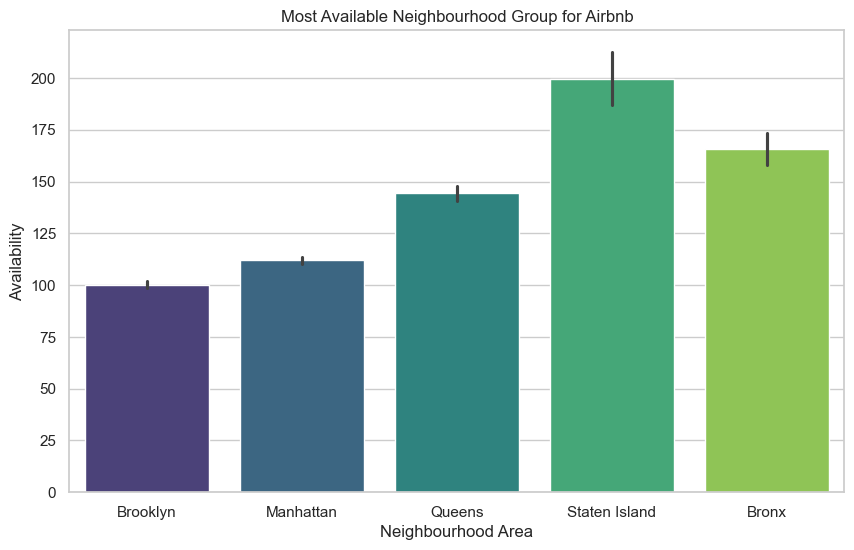

In [83]:
#Most available neighbourhood group for Airbnb

plt.figure(figsize=(10,6))
sns.barplot(data=df,x='neighbourhood_group', y='availability_365',  palette='viridis')
plt.title('Most Available Neighbourhood Group for Airbnb')
plt.xlabel('Neighbourhood Area')
plt.ylabel('Availability')
plt.show()

/var/folders/m4/73z5fngj13lf7fc6mrgybdkc0000gn/T/ipykernel_35227/691169849.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='neighbourhood_group', y='price',  palette='viridis')


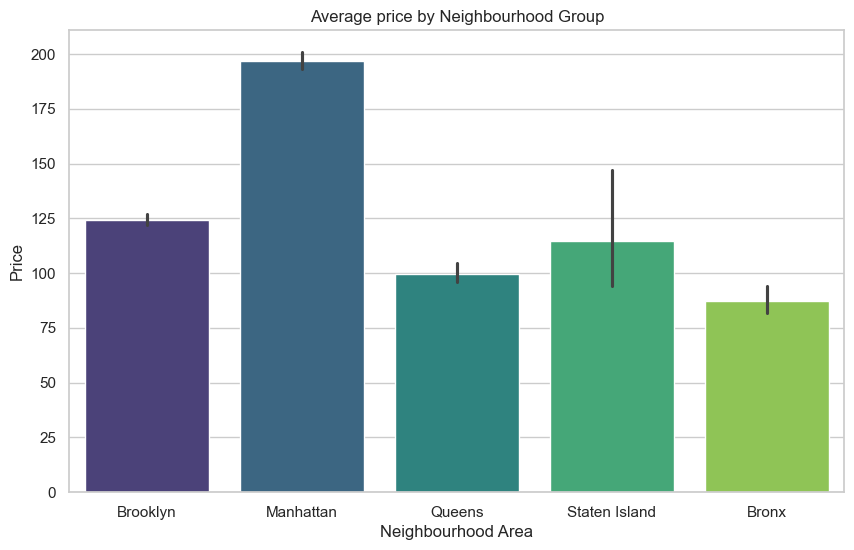

In [84]:
#Average price by Neighbourhood Group

plt.figure(figsize=(10,6))
sns.barplot(data=df,x='neighbourhood_group', y='price',  palette='viridis')
plt.title('Average price by Neighbourhood Group')
plt.xlabel('Neighbourhood Area')
plt.ylabel('Price')
plt.show()

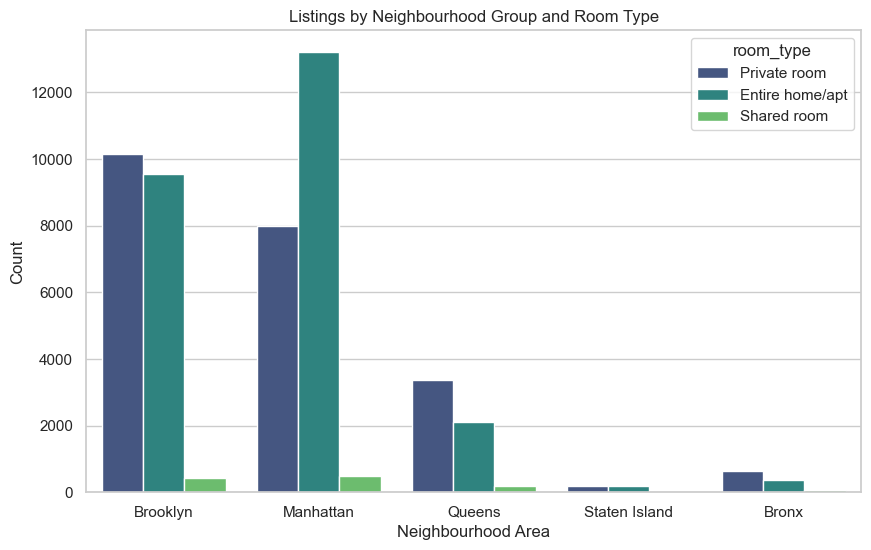

In [85]:
#Listings by Neighbourhood Group and Room Type
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='neighbourhood_group',hue='room_type', palette='viridis')
plt.title('Listings by Neighbourhood Group and Room Type')
plt.xlabel('Neighbourhood Area')
plt.ylabel('Count')
plt.show()

# Key Insights from EDA:
1.Price Distribution:
The majority of listings are priced between 100 to 200.
After 250, listing frequency significantly drops and the listings are further spread around up to 500

2.Room Type:
The highest type of rooms seen are either Entire home/apt or Private room.

3.Room Type Vs Price:
Entire homes/apartments are generally much more expensive and have greater price variability.
Private rooms are priced in the middle, offering more affordable options than entire homes but usually costing more than shared rooms.
Shared rooms are the least expensive and exhibit less price variability.

4.Reviews Vs Room Type:
Private rooms and entire homes/apartments are generally more actively reviewed and possibly more frequently booked than shared rooms.

5.Top 10 Hosts
Sonder(NYC) is the top host with over 100000 listings followed by Blueground with around 50000 listings. Other top 10 host's listings are quite low in comparision.

6.Price Vs Host Listing count
Small hosts (1–30 listings): High price diversity, including the most expensive outliers.
Large hosts (100+ listings): Usually offer lower-priced listings with little presence in the luxury segment.

7.Monthly reviews
print(".Majority of Airbnb receives very few monthly reviews, with most listings clustered below 5 reviews per month.

8.Top Neighbourhoods:
The Williamsburg and Bedford-Stuyvesant have the highest number of listings (3,500–4,000).
Harlem and Bushwick follow, while the remaining neighborhoods in the top 10 range between 1,500–2,000 listings.

9.Availability Vs Neighbourhood Areas:
Staten Island has highest room availability, followed by Bronx and Queens.

10.Average Price Vs Neighbourhood Areas:
The average price of Manhatten is the highest at around $190. Second is Brooklyn and third is Staten Island.

11.Listings by Neighbourhood Areas and Room Type:
Manhatten has the highest listing with Room Type = Entire Home/apt being the majority sector.

12.Price Vs Number of Reviews:
Most reviews cluster in listings priced between 50 and 250.
Private rooms and shared rooms dominate lower price ranges, especially around 100 dollars. 
Listings above 150 dollars are mostly Entire home/apartment, showing a correlation between price and property type.
